# Evaluating Top Nail Salons Near Me in Ottawa
For the R-Ladies' data challenge, the main theme was to find a passion project to round out one's portfolio and develop their professional story. Upon review of my Github and previous projects completed in the past, I decided to use this challenge to learn how to present visuals with the Python language. I primarily use Excel and Power BI as a Business/Data Analyst for presenting visuals, so this was my first time learning to work with various Python libraries for visuals instead.

Living downtown in the city of Ottawa, I find a lot of nail salons pop up around my neighbourhood which got me wondering, 'just how many are there in my area and which ones are the best based on ratings and reviews?'

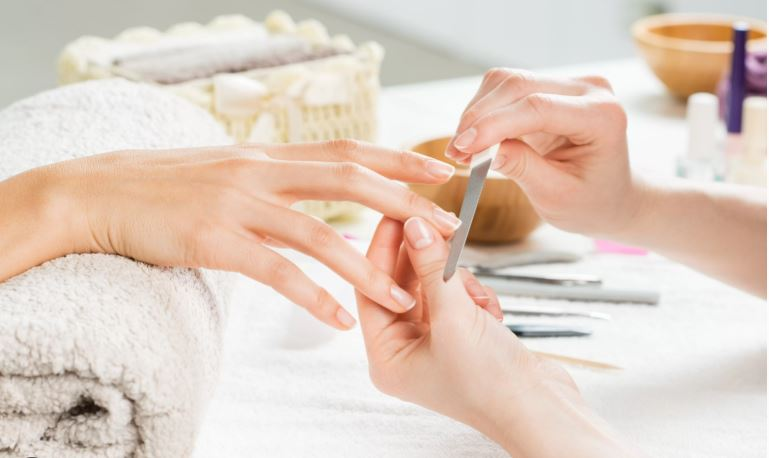

## Gathering the Data
To find the best nail salon, I could have opened up and checked for all nail salons in my area on Google maps, but that would have involved scrolling through countless businesses. I needed an easier way to gather all the data in one place for data analysis and so I looked for tools to assist. 

For this personal project, I ended up using this open sourced tool to help me find all nail salons near me in Ottawa on Google Maps and exported the information into an .xlsx file: https://github.com/omkarcloud/google-maps-scraper/tree/master

This file contained information such as the number of reviews each nail salon had, the ratings, the opening hours, location, etc. After having all the data conveniently in a file, it was time to start working on examining the data.


## Examining the Data
I imported the main libraries I needed for this project which were the popular and common 'numpy', 'pandas', and 'matplotlib' libraries for graphs.
After reading my excel file I took a look to see what the data and columns were like


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

df = pd.read_excel('nailSalonsinOttawa.xlsx').convert_dtypes()
print(df.head())

                      place_id               name  \
0  ChIJ69F51hYFzkwRE98saI2_k8M      Cony Nail Spa   
1  ChIJDyR-NP0EzkwRRQfHmVD03pY  Smudge Beauty Bar   
2  ChIJ43YnzVMFzkwR3OjSDP5sDbs  La Crystal Studio   
3  ChIJn9x9Hl8FzkwR3KhkNqjwglY         Dope Nails   
4  ChIJWeiI2zMFzkwRw0dhDBCHaDE    Rideau Nail Spa   

                                         description  is_spending_on_ads  \
0  Welcome to Cony Nail Spa, your oasis of relaxa...               False   
1  Smudge is an easy-going, chilled out beauty sh...               False   
2          Your local nail salon in downtown Ottawa.               False   
3            We’re here to make your Nails look DOPE               False   
4  Nestled in the heart of Ottawa, Rideau Nail Sp...               False   

   reviews  rating                                        competitors  \
0      284     4.8  Name: Dope Nails
Link: https://www.google.com/...   
1      473     4.8  Name: La Crystal Nail & Spa
Link: https://www....   
2    

In [ ]:
# pip install folium    I used this for mapping out the locations later on, only needed to install it once

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   place_id               109 non-null    string 
 1   name                   109 non-null    string 
 2   description            72 non-null     string 
 3   is_spending_on_ads     109 non-null    boolean
 4   reviews                109 non-null    Int64  
 5   rating                 109 non-null    Float64
 6   competitors            108 non-null    string 
 7   website                89 non-null     string 
 8   phone                  107 non-null    string 
 9   can_claim              109 non-null    boolean
 10  owner_name             109 non-null    string 
 11  owner_profile_link     104 non-null    string 
 12  featured_image         109 non-null    string 
 13  main_category          109 non-null    string 
 14  categories             109 non-null    string 
 15  workda

<b>The data had 28 columns, though I will only require some of them and will select the ones I want to look at throughout this project<b>

## Examining Salons with the Highest Number of Reviews

The first information I wanted to find out was which nail salons in Ottawa had the greatest number of reviews in total. I only wanted to see the top 5,  so I filtered to only have the top highest review numbers and set up my horizontal bar chart. 

In Ottawa, Rose & Rebel Salon have the highest number of reviews at 1053, with the rest being above 500! However, this doesn't paint the full picture yet. Upon external research, Rose & Rebel have been around for 5-6 years and are primarily a hair salon who ALSO provide nail services. This also applies to #2: Flawless Hair Salon. The rest of the top 5 provide other spa related services which means that despite the high number of reviews, <b>not all those reviews are related directly to nail services.<b>

Seeing as how this project aims to look at the best 'nail salons' I have to keep this information in mind when searching for the best 'nail' salons



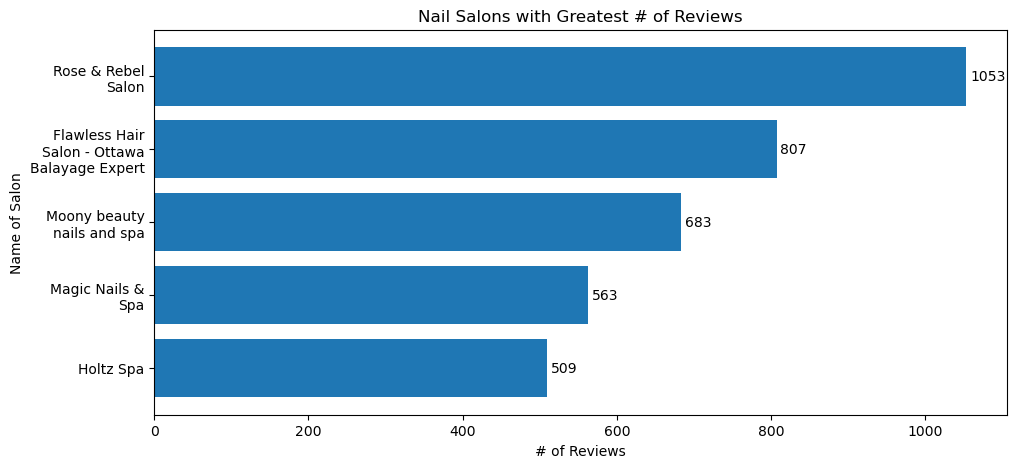

In [5]:
import textwrap

top_reviews = df.nlargest(5,["reviews"], keep='all').sort_values(by="reviews", ascending=True)[["name","rating","reviews","Ward"]]
reviews = list(top_reviews["reviews"])
salon_name = list(top_reviews["name"])

plt.figure(figsize=(11, 5))

wrapped_labels = ['\n'.join(textwrap.wrap(name, width=15)) for name in salon_name]

plt.barh(wrapped_labels, reviews)
plt.title('Nail Salons with Greatest # of Reviews')
plt.ylabel('Name of Salon')
plt.xlabel('# of Reviews')
for i, v in enumerate(reviews):
    plt.text(v + 5, i, str(v), va='center', fontsize=10)  # Adjusting 5 for spacing

plt.show()

## Examining Salons with the Highest Star Rating
The next step after looking at the greatest number of reviews was to see which nail salons had the highest star rating on Google. To look at the relationship between number of reviews versus ratings, I first plotted a scatterplot graph. 

The graph below indicates that most Google ratings of nail salons near me are 4 stars and higher. There are quite a fair amount around 4.5 stars and approximately 6 salons have the highest rating of 5 stars. 



Text(0, 0.5, '# of Reviews')

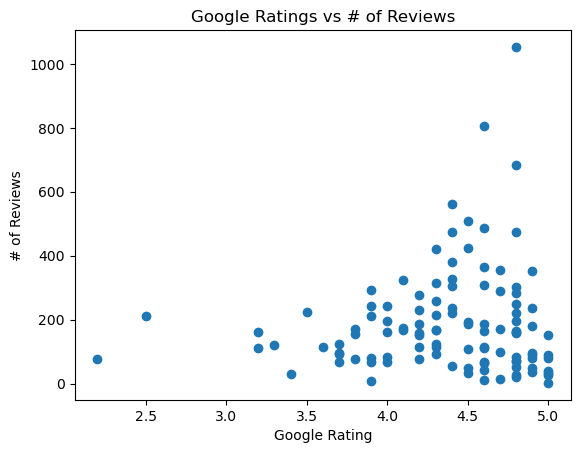

In [25]:
scatter_fig, scatter_ax = plt.subplots()
scatter_ax.scatter(df["rating"], df["reviews"])
scatter_ax.set_title("Google Ratings vs # of Reviews")
scatter_ax.set_xlabel("Google Rating")
scatter_ax.set_ylabel("# of Reviews")

Now looking back at the top 5 salons with highest # of reviews, I wanted to see what their ratings were and which neighbourhood/city ward they were located in. Rose & Rebel Salon had the highest reviews and also had very high ratings of 4.8 stars, which is the same as Moony Beauty Nails and Spa which ranked 3rd in number of reviews.


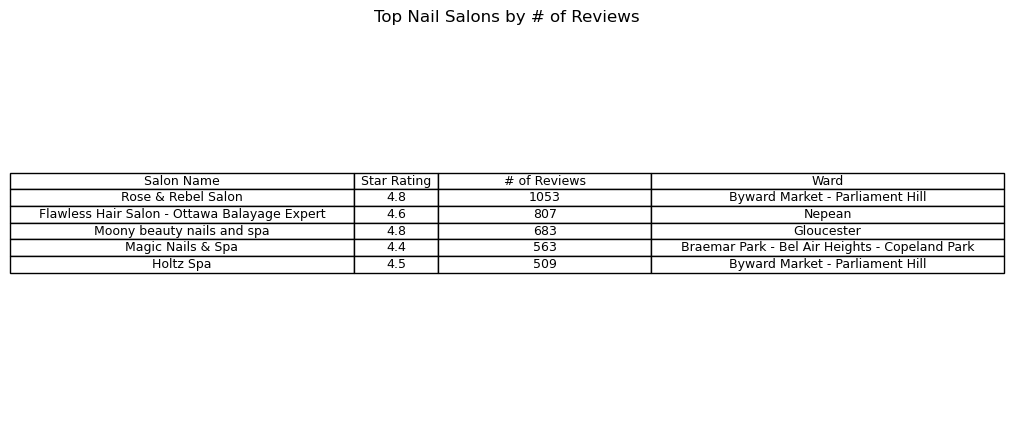

In [6]:
fig, ax = plt.subplots(figsize=(11,5))

# Hide axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
ax.set_frame_on(False)  

table_column_names = ("Salon Name","Star Rating","# of Reviews","Ward")
top_reviews_sortedDesc = top_reviews.sort_values(by="reviews", ascending=False)

table = ax.table(cellText=top_reviews_sortedDesc.values, 
                 colLabels=table_column_names, 
                 cellLoc='center', 
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(9)
table.auto_set_column_width([0, 1, 3]) 

plt.title("Top Nail Salons by # of Reviews")
plt.show()

Now what about those top star salons that we saw from the scatterplot? We'll be taking a look at them below. The top 'rated' salons have 4.9 or 5 stars, but you can see that 11/15 (73.33%) of these salons have less than a hundred reviews, with LJ Nails only having 2 in total! It is very likely they are new nail salons that may have opened up recently and haven't had a lot of customers yet.

By looking at the data so far, it seems that relying only on star ratings may not provide a big enough customer experience pool for me to judge how good the nail salon is. On the other hand, if I only look at the volume of reviews I can't tell how many reviews are related to nail services or even if those reviews may be negative or positive.

The information so far has provided me good starting points however, on nail salons I can start looking into for more details.

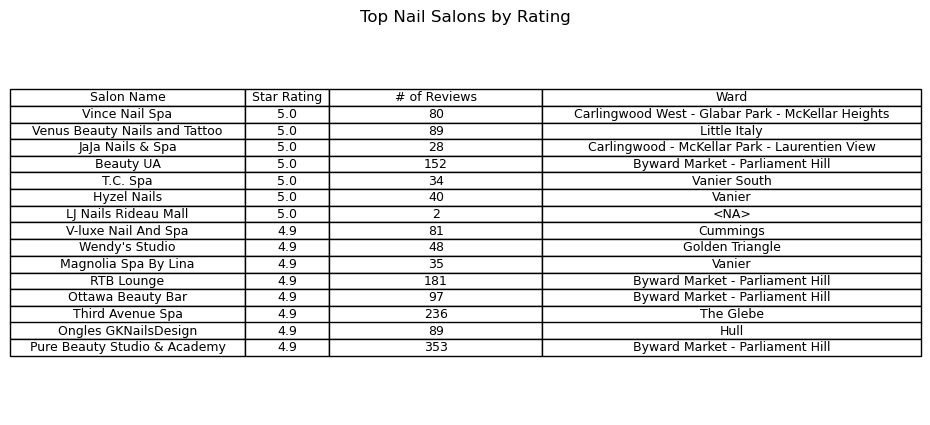

In [5]:
top_rated = df.nlargest(10,["rating"], keep='all').sort_values(by="rating", ascending=False)[["name","rating","reviews","Ward"]]

table_column_names = ("Salon Name","Star Rating","# of Reviews","Ward")

fig, ax = plt.subplots(figsize=(11,5))

# Hide axes
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
ax.set_frame_on(False)  

table = ax.table(cellText=top_rated.values, 
                 colLabels=table_column_names, 
                 cellLoc='center', 
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(9)
table.auto_set_column_width([0, 1, 3]) 

plt.title("Top Nail Salons by Rating")
plt.show()


## Location of the Nail Salons

Apart from reviews and ratings, I wanted to see which areas the nail salons in my dataset were actually located in. The dataset contained Google maps information on the latitude and longitude points, address, and City Ward of the salons to aide in my analysis. Firstly, I went with a pie graph to show the breakdown of the locations of the salons by city ward.

Then, to visualize the locations of the salons in more graphic details I used a 3rd party library to plot the locations on a map


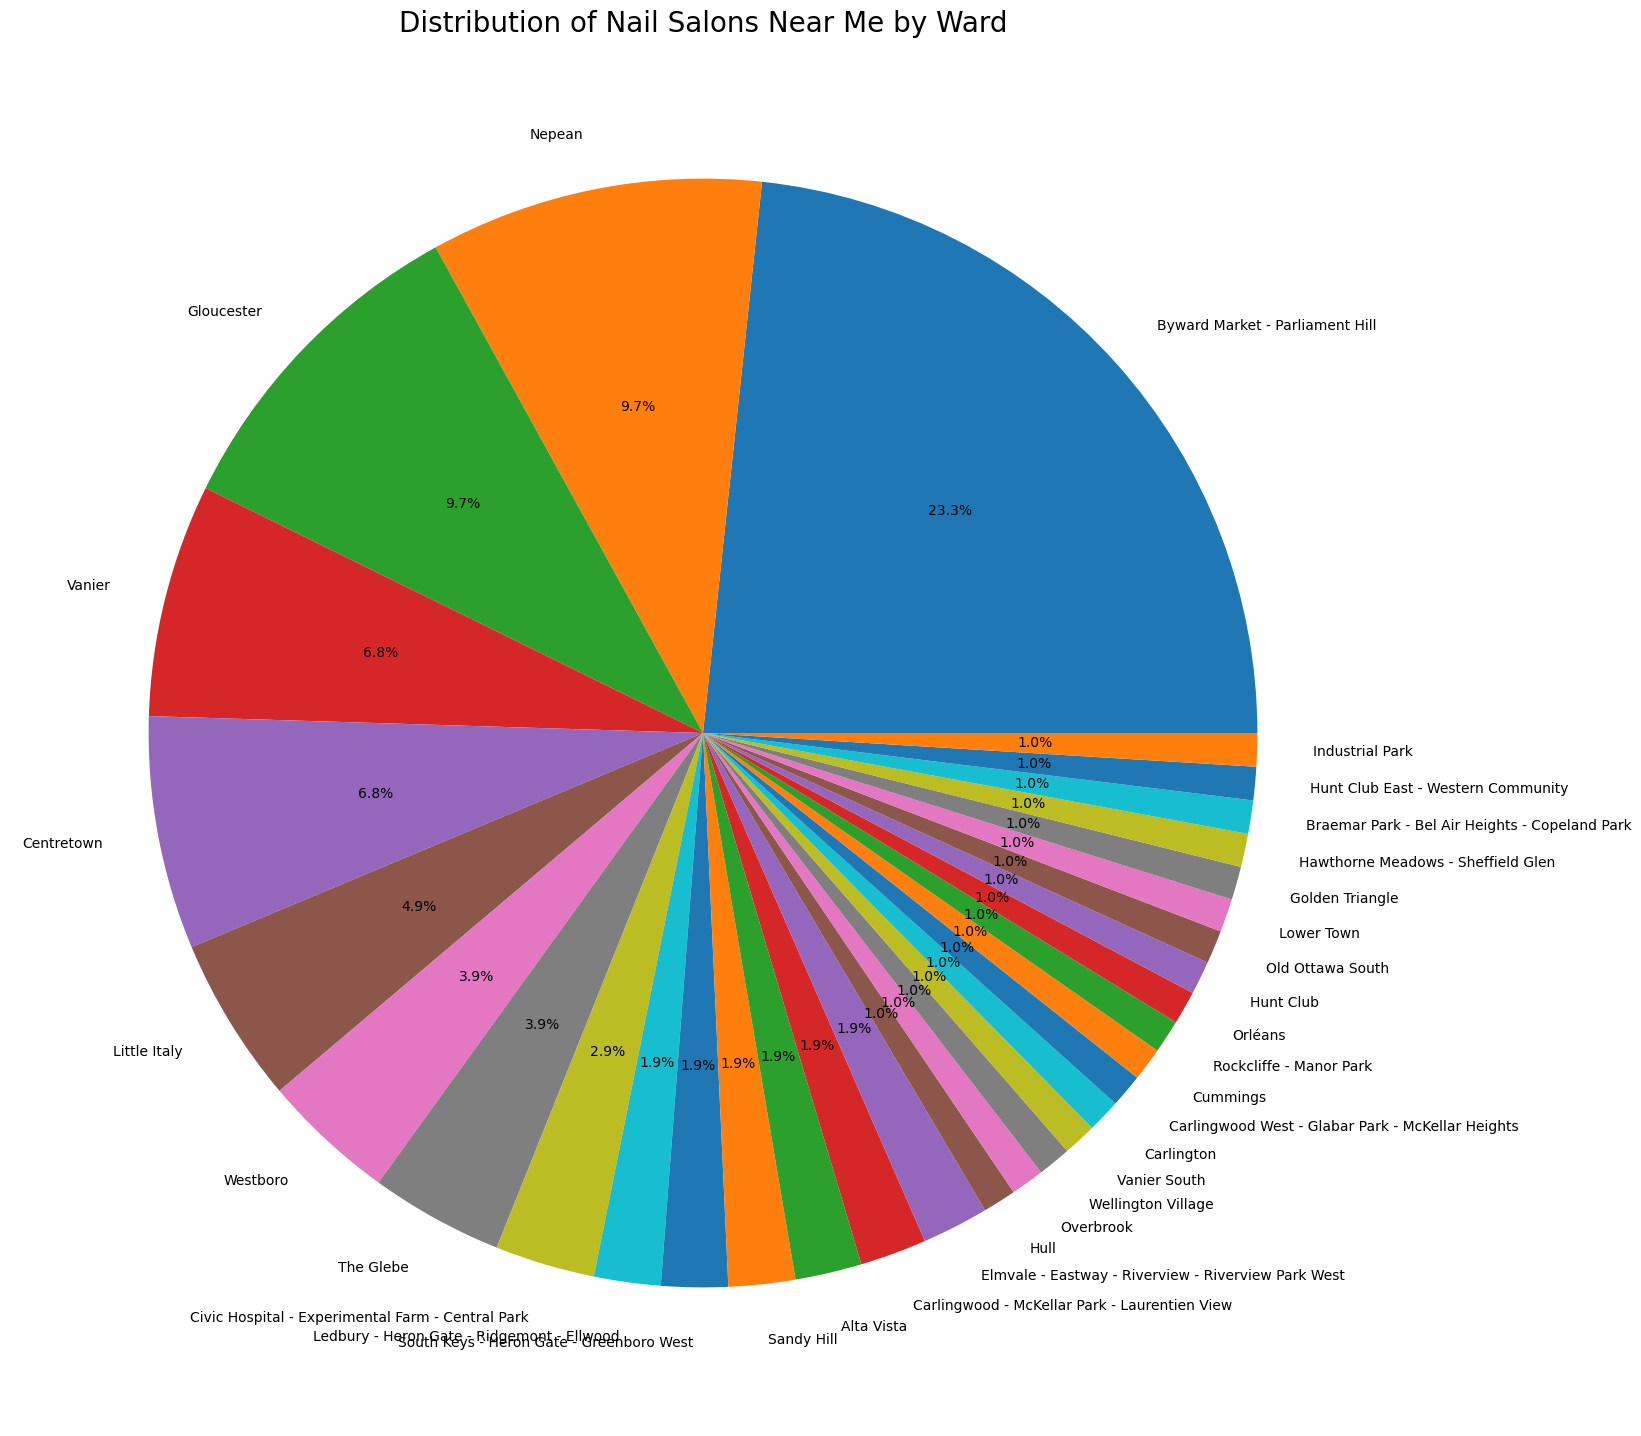

In [10]:
grouped_ward = df.groupby('Ward').name.nunique().sort_values(ascending=False)
count_of_salons = grouped_ward.values
pie_chart_labels = grouped_ward.index

plt.figure(figsize=(18, 18))
plt.title('Distribution of Nail Salons Near Me by Ward', fontsize=20)
plt.pie(count_of_salons, labels=pie_chart_labels, autopct='%1.1f%%')
plt.show()


In [19]:
ottawa_center = [45.4215, -75.6993]

# Create a folium map centered on Ottawa
map = folium.Map(location=ottawa_center, zoom_start=12)

for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longtitude']], 
        popup=row['name'],  
        icon=folium.Icon(color="purple", icon="info-sign") 
    ).add_to(map)

map

Since I live in downtown Ottawa, the breakdown of locations matched my assumptions on how the data would look when I scraped it; with a higher cluster of points around Centertown and Vanier in Ottawa, and 23.3% (close to 1/4) of the 109 salons in my dataset being in the area of Byward Market- Parliament.

It was interesting to see just how many nail salons were so close to home! I am truly spoiled for choices in this regard.

## Salon Closed Days

Now that I was aware of the number of salons close to me, I wanted to see how many were closed on Sundays or other days of the week. As I usually have a busy week, Sunday is my relaxation day and if I wanted to get my nails done that day, how many and which nail salons would actually be opened?

In [40]:
grouped_closedDays = df.groupby('closed_on').name.nunique().sort_values(ascending=False)
print(grouped_closedDays)

closed_on
Open All Days         55
Sunday                33
Monday, Sunday        11
Monday                 4
Saturday, Sunday       3
Tuesday, Sunday        1
Tuesday, Wednesday     1
Name: name, dtype: int64


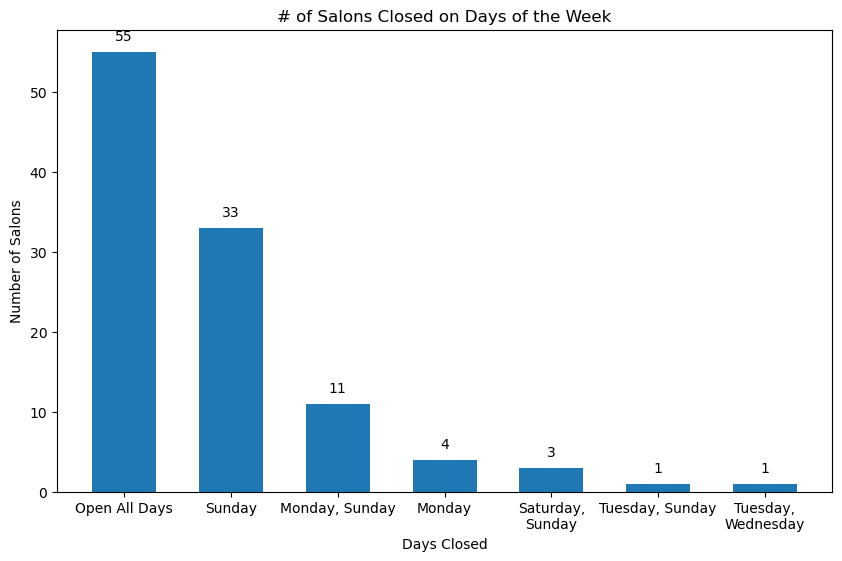

In [58]:
number_of_salons = grouped_closedDays.values
closed_days = grouped_closedDays.index

fig, ax = plt.subplots(figsize=(10,6))
                      
wrapped_labels = ['\n'.join(textwrap.wrap(day, width=15)) for day in closed_days]
width = 0.6

data_bars = plt.bar(wrapped_labels, number_of_salons, width=width)

plt.title('# of Salons Closed on Days of the Week')
plt.ylabel('Number of Salons')
plt.xlabel('Days Closed')

# Adding labels using enumerate()
for i, v in enumerate(number_of_salons):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)
    
plt.show()

Looking at the bar graph, seems like 33 (30%) of the Nail Salons would be closed on Sunday, but 55 (50%) of the nail salons were actually opened every day of the week! So if I wanted to have my nails done on Sunday, I would not need to worry about the lack of remaining options of where to go.

Finally, to end my data analysis I wanted to take a look at the list of the salons that were opened 7 days a week. Here's hoping the owners and employees take enough breaks!

In [7]:
salons_opened_all_days = df.loc[df["closed_on"]=="Open All Days", ["name", "reviews","rating","workday_timing"]]

new_column_names = {
    "name":"Salon Name",
    "reviews":"# of Reviews",
    "rating":"Google Rating",
    "workday_timing":"Operating Hours"
}

salons_opened_all_days= salons_opened_all_days.rename(columns = new_column_names)

salons_opened_all_days.sort_values(by=["Google Rating"], ascending=False).reset_index(drop=True)

Salon Name  # of Reviews  Google Rating  \
0                           LJ Nails Rideau Mall             2            5.0   
1                                 Vince Nail Spa            80            5.0   
2                  Venus Beauty Nails and Tattoo            89            5.0   
3                               JaJa Nails & Spa            28            5.0   
4                                     RTB Lounge           181            4.9   
5                              Ottawa Beauty Bar            97            4.9   
6                            V-luxe Nail And Spa            81            4.9   
7                     Moony beauty nails and spa           683            4.8   
8               Catchy Beauty Eyelash Extensions           248            4.8   
9                              Smudge Beauty Bar           473            4.8   
10                Elite Beauty Lab - Medical Spa            53            4.8   
11                                 Cony Nail Spa           284            4.8   
12                              Stay Gold Beauty            19            4.8   
13                       Lancaster Nails and spa           301            4.8   
14                               Rideau Nail Spa            82            4.8   
15                                Salon Fiorella           170            4.7   
16                             La Crystal Studio           289            4.7   
17                 Polish Me Pretty Nails & More           112            4.6   
18                           Holiday Nails & Spa           309            4.6   
19  Flawless Hair Salon - Ottawa Balayage Expert           807            4.6   
20                      Diamond Star Nails & Spa            41            4.6   
21                                  THE TEN SPOT           488            4.6   
22                             mystic nail salon           107            4.5   
23                    Vanism Nail Spa and Lashes           191            4.5   
24                                  THE TEN SPOT           424            4.5   
25                                     Holtz Spa           509            4.5   
26                          BN Nail and Foot Spa           185            4.5   
27                         La Crystal Nail & Spa           474            4.4   
28                   High Definition Nails & Spa           381            4.4   
29                             Magic Nails & Spa           563            4.4   
30                               York Street Spa           235            4.4   
31                          Glorious Nails & Spa           259            4.3   
32                             Lilac Nails & Spa           314            4.3   
33                           Emerald Nails & Spa           123            4.3   
34                                tBeauty Lounge           168            4.3   
35                                    Dope Nails           421            4.3   
36                           LuxMe nails and spa           278            4.2   
37                            Zoey nails and spa           152            4.2   
38                               Naturally Nails           323            4.1   
39                              SUGAR BEAUTY BAR           174            4.1   
40                                LJ Nails & Spa            83            4.0   
41                     Nice One Nails (Baseline)           197            4.0   
42                        ARTISTIC NAILS and SPA           242            4.0   
43                              DN Nails And Spa           294            3.9   
44                       Westboro Infinity Nails           210            3.9   
45                              Royale One Nails            68            3.9   
46                                 Pro Nails Spa            77            3.8   
47                         Hunt Club Nails & Spa           171            3.8   
48                   Beechwood Oasis Nails & Spa            92       

## Conclusions

Trying to determine the best nail salons close to my home was not simply a matter of finding the highest number of reviews for a business or the top rated ones. As I've uncovered, nail salon businesses with the highest volume of reviews also offer other types of services, making it difficult to determine how many positive or negative reviews were related to just nail services alone. 

As for ratings, most nail salons scored 4 stars or above but most of the '5 star' businesses had less than 100 customer reviews, making it difficult to know if they were truly better than salons that may have scored 4.8 for example, but with 500+ reviews. 
A next step for this project would be to start evaluating the Google comments for these businesses to weigh the positive/negative reviews and to research how long some of these businesses have been operating for, as that would influence the number of reviews. However, that is beyond the current scope of this project.

The results I've seen so far provide a good enough starting point for me with a list of businesses I would look into. I would personally examine the salons with greatest number of reviews first and then research for futher details such as the type of nail services provided and pricing.

Overall this project was a good way for me to learn and present Python graphs and visuals while exploring a fun topic. Now I can plan for my next manicure and pedicure.